In [1]:
%load_ext autoreload
%autoreload 2

from operaDB import OperaDB
from omronEyeLib import OmronEye
from imageLib import OperaImage
from sensorLib import *
import math
import numpy as np
import pandas as pd
import time

#Connection to opera DB
opera = OperaDB('opera_conn.xml', 'lifelog-shimizu')
#cur.execute("select version()")
#print(cur.fetchall())


/usr/local/lib/python3.5/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


connect to opera server


In [2]:
#Get time from video
#desire_date = '2018-07-27'
#desire_date = '2018-08-22'
#desire_date = '2018-09-19'
desire_date = '2018-09-26'

#opera.get_TripListFromTime('2018-09-19', '00:00:00.0000', '23:59:59')
tripLists = opera.get_TripListFromTime(desire_date)
print(tripLists)

                                     id     start_time   length  \
0  6ddb9062-c12c-11e8-ad67-06dc25b93fb2  1537925720190     9973   
1  8b8e87ea-c12c-11e8-ad67-06dc25b93fb2  1537925770180     4822   
2  d70251de-c12c-11e8-ad67-06dc25b93fb2  1537925896758    35510   
3  0c661892-c12d-11e8-ad67-06dc25b93fb2  1537925986346  1588560   
4  de9157c8-c132-11e8-ad7b-06dc25b93fb2  1537928486195    29276   
5  340d32ee-c133-11e8-ad7c-06dc25b93fb2  1537928629543   514081   

                                user_id  
0  687b7332-3c82-11e8-91ea-06dc25b93fb2  
1  687b7332-3c82-11e8-91ea-06dc25b93fb2  
2  687b7332-3c82-11e8-91ea-06dc25b93fb2  
3  687b7332-3c82-11e8-91ea-06dc25b93fb2  
4  687b7332-3c82-11e8-91ea-06dc25b93fb2  
5  687b7332-3c82-11e8-91ea-06dc25b93fb2  


In [5]:
#OBD data
obd = OBD( opera )
column_names, df_obd = obd.get_DataFrameFromTrip( tripLists, 5, -20 )

['id', 'time', 'vehicle_speed', 'relative_accelerator_pedal_position', 'user_id']


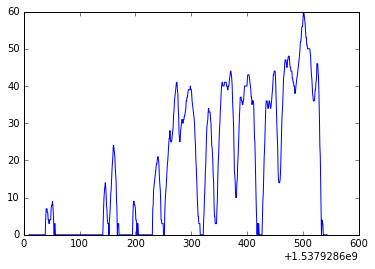

In [6]:
import matplotlib.pyplot as plt
print(column_names)
plt.plot(df_obd['time']/1000,df_obd['vehicle_speed'])
plt.show()

In [7]:
#Get Omron Eye data
omron = OmronEye( opera )
column_names, df_omron = omron.get_DataFrameFromTrip( tripLists, 5, -20 )
    
print("column names : ")
print(column_names)
print('Read recoard len : ' + str(len(df_omron)))
print('Time[s] : ' + str((df_omron['time'][len(df_omron)-1]-df_omron['time'][0])/1000) )

column names : 
['id', 'time', 'frame_id', 'soft_ver', 'dt_width', 'dt_height', 'dt_px', 'dt_py', 'pt_roll', 'pt_yaw', 'pt_pitch', 'gb_yaw', 'gb_pitch', 'gb_open_l', 'gb_open_r', 'model', 'user_id']
Read recoard len : 7820
Time[s] : 533.577


7820


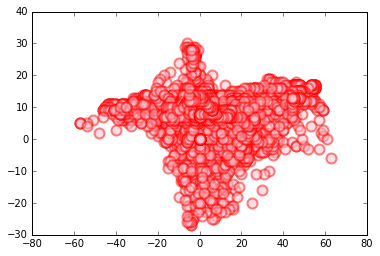

In [8]:
import matplotlib.pyplot as plt
print(len(df_omron['pt_yaw']))
a = np.zeros(len(df_omron['pt_yaw']))

plt.scatter(df_omron['pt_yaw'], df_omron['pt_pitch'], s=100, c="pink", alpha=0.5, linewidths="2", edgecolors="red")
plt.show()
#print(df['pt_yaw'])

In [3]:
#動画ファイルをグラブ
import cv2

video = OperaImage( opera )
videoCaps = video.get_VideoCapture(tripLists, 5)

print( video.get_SizeFrameCount(videoCaps[0]) )
print( video.get_FPS(videoCaps[0]) )
print( video.get_SizeFrameCount(videoCaps[0])/video.get_FPS(videoCaps[0]) )
w = videoCaps[0].get(cv2.CAP_PROP_FRAME_WIDTH)
h = videoCaps[0].get(cv2.CAP_PROP_FRAME_HEIGHT)

0           1537928629543.mp4
1    1537928629543_inside.mp4
Name: filename, dtype: object
open front video file : False
open room video file : False
0
0.0


ZeroDivisionError: float division by zero

10001
65.31905166220365


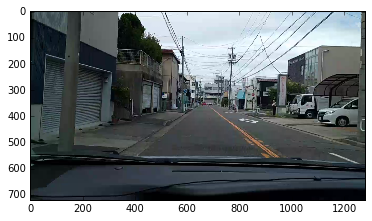

In [68]:
#view image
import matplotlib.pyplot as plt

videoCaps[0].set(cv2.CAP_PROP_POS_FRAMES,10000)
ret, frame = video.read( videoCaps[0] )
# Capture frame-by-frame
#for i in range(0,10000):
#    ret, frame = video.read( videoCaps[0] )
    
if( ret == True ):
    print( video.get_FrameCount( videoCaps[0] ))
    print( video.get_FrameCount( videoCaps[0] )/video.get_SizeFrameCount(videoCaps[0])*100 )
    # Display the resulting frame
    plt.imshow(frame)
    plt.show()

    #Nexus 6P (6.17mm sensor, 4.67mm) 66.9°37.2%
    #Nexus 6P 79deg
else:
    print("Reading is fail or end of video")

In [69]:
#Visible eye tracking on front view image 1. get data
#get current image time stamp
cTime = video.get_TimeStamp( videoCaps[0] )
print(cTime/1000)
omron = OmronEye( opera )
#変更したので要修正
column_names, df = omron.get_DataFrameFromDuration( cTime-5/2*1000, 5 )

#print(df)
print(column_names)
print('Read recoard len : ' + str(len(df)))
print('Time [s]' + str((df['time'][len(df)-1]-df['time'][0])/1000) )

1537928964.152
['id', 'time', 'frame_id', 'soft_ver', 'dt_width', 'dt_height', 'dt_px', 'dt_py', 'pt_roll', 'pt_yaw', 'pt_pitch', 'gb_yaw', 'gb_pitch', 'gb_open_l', 'gb_open_r', 'model', 'user_id']
Read recoard len : 73
Time [s]4.917


73


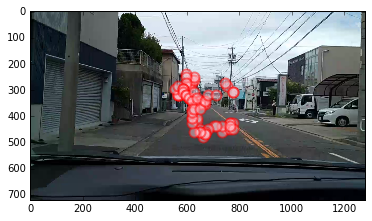

In [70]:
#Visible eye tracking on front view image 2. visualize
import matplotlib.pyplot as plt
import math

fx = 600
fy = fx
x=[]
y=[]
for yaw in df['gb_yaw']:
    x.append( w/2 - fx*math.tan(math.radians(yaw)) + 40 ) 
    
for pitch in df['gb_pitch']:
    y.append( h/2 - fx*math.tan(math.radians(pitch)) + 120)

print(len(df['pt_yaw']))
a = np.zeros(len(df['gb_yaw']))
plt.scatter(x, y, s=100, c="pink", alpha=0.5, linewidths="2", edgecolors="red")

img = np.array( frame )
plt.imshow(img)
plt.show()


In [ ]:
#Get Eye data
#ToDo library
l=2
start_datetime = df_tripLists['start_time'][l]
stop_datetime = start_datetime + df_tripLists['length'][l]

print

#Create Query
query_omroncamera = 'SELECT * FROM driveragent_omroncamera'
datetime_conditions = ' WHERE id = ' +  "'" + str(df_tripLists['id'][l]) + "'"
#datetime_conditions = ' WHERE id = ' +  "'03797146-9141-11e8-921d-06dc25b93fb2'"
test_opt = ' ORDER BY time ASC LIMIT 100'
query = query_omroncamera + datetime_conditions + test_opt + ';'

print(query)

try:
    cur.execute(query)
    print('Get column names')
    column_names = [desc[0] for desc in cur.description]
    print(column_names)
    df = pd.DataFrame(columns=column_names)
    
    for row in cur.fetchall():
        df_ = pd.Series(list(row), index=column_names)
        df = df.append(df_, ignore_index=True)
    
    print('Read recoard len : ' + str(len(df)))

except Exception as e:
    #
    conn.rollback()
    print( e.pgerror )

In [ ]:
#タイムスタンプのチェック
from datetime import datetime, timezone, timedelta

#now = 1532651953073/1000
now = 1532666822706/1000
utc = datetime.fromtimestamp(now, timezone.utc)
print(utc)

JST = timezone(timedelta(hours=+9), 'JST')
loc = datetime.fromtimestamp(now, JST)
print(loc)

#Get time from video
desire_date = '2018-07-27'
desire_length = pd.Timedelta('23:59:59')

#ToDo library
desire_time = '00:00:00.0000'
desire_datetime = desire_date + ' ' + desire_time
start_datetime = pd.Timestamp(desire_datetime)
stop_datetime = start_datetime + desire_length

mysql_datetime = int(time.mktime(start_datetime.timetuple()))*1000
mysql_stoptime = int(time.mktime(stop_datetime.timetuple()))*1000

print(mysql_datetime)

